# Uber Case Study

 The aim of analysis is to identify the root cause of the problem (i.e. cancellation and
 non-availability of cars) and recommend ways to improve the situation. As a result of your 
 analysis, you should be able to present to the client the root cause(s) and possible hypotheses
 of the problem(s) and recommend ways to improve them.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Uber Request Data.csv")

In [3]:
df
# We get an idea of table contents and total rows & columns

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


There are six attributes associated with each request made by a customer:
1. Request id: A unique identifier of the request
2. Time of request: The date and time at which the customer made the trip request
3. Drop-off time: The drop-off date and time, in case the trip was completed
4. Pick-up point: The point from which the request was made
5. Driver id: The unique identification number of the driver
6. Status of the request: The final status of the trip, that can be either completed, cancelled
by the driver or no cars available
Note: For this assignment, only the trips to and from the airport are being considered.

In [4]:
# Checking for null values
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [5]:
# Checking if datatype of timestamp is date-time type or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# As we check data that it has some '/' in some date and '-' in some, we need to make it same. To do this we first convert it to string.
df['Request timestamp']= df['Request timestamp'].astype(str)
df['Drop timestamp']= df['Drop timestamp'].astype(str)
df['Request timestamp']= df['Request timestamp'].replace('/','-')
df['Drop timestamp']= df['Drop timestamp'].replace('/','-')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     6745 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [7]:
# As we can see datatype of timestamp is not date-time, let's fix that.
df['Request timestamp']= pd.to_datetime(df['Request timestamp'], dayfirst=True)
df['Drop timestamp']= pd.to_datetime(df['Drop timestamp'], dayfirst=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [8]:
# Now we make seperate column for cab requested hour for future analysis
req_hour= df['Request timestamp'].dt.hour
df['req hour']=req_hour
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [9]:
# Now we make seperate column for cab requested day for future analysis
req_day=df["Request timestamp"].dt.day
df['req day']= req_day
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour,req day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [10]:
# We import seaborn & matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\snegi\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


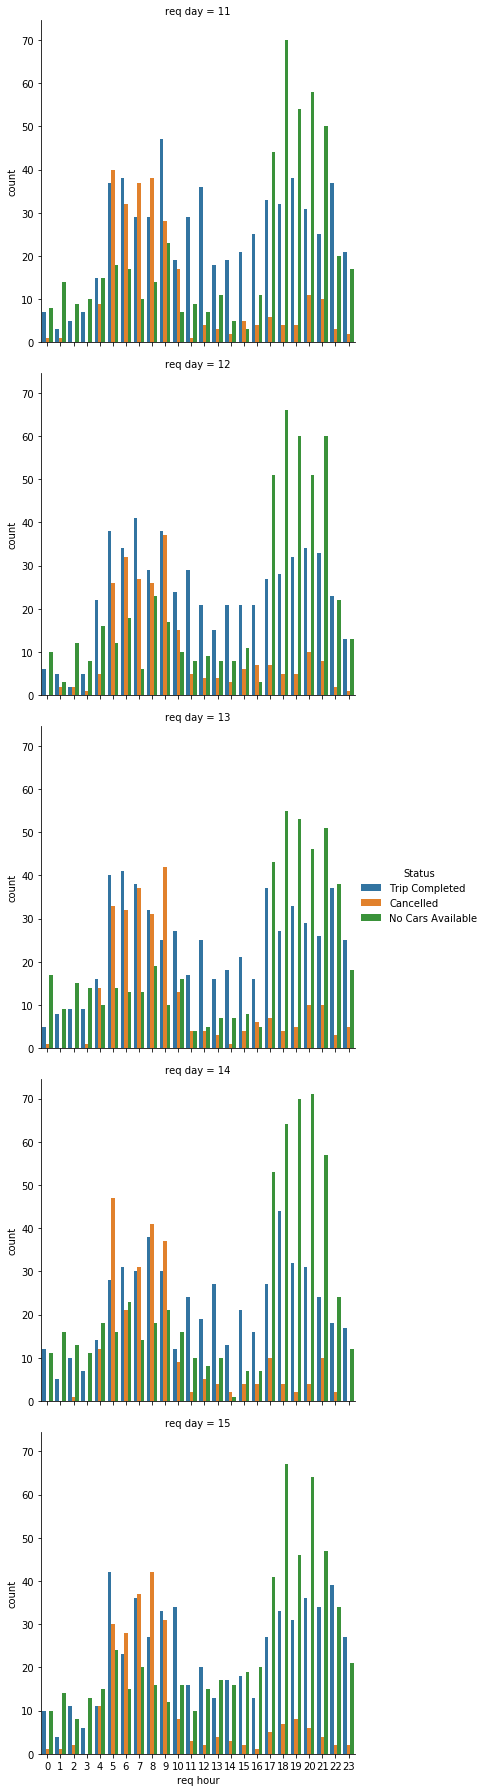

In [11]:
sns.factorplot(x='req hour',row='req day',data=df,kind='count',hue='Status')

Above graphs shows data for 4 days, because we only have complete data for these 4 days, we will use these 4 days data for further analysis.
From this data we see a pattern which is almost same in all 4 days.

#### Let's do further analysis using pickup points

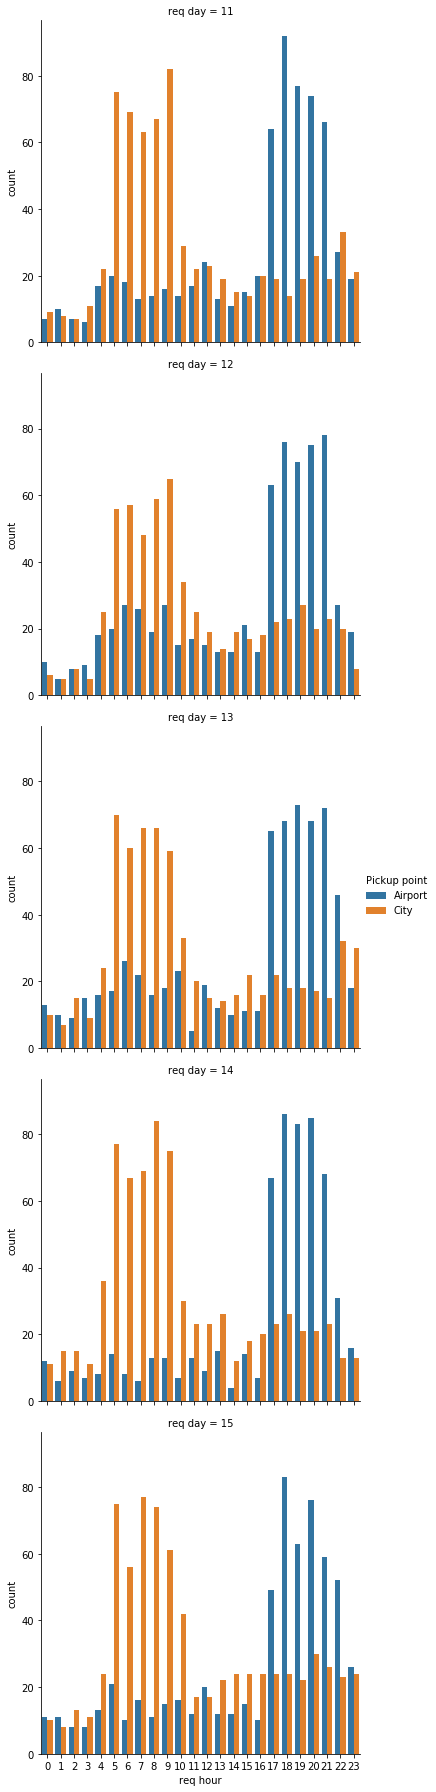

In [12]:
sns.factorplot(x='req hour',row='req day',data=df,hue='Pickup point',kind='count')


So from the above graphs we get an idea that at night pick up at airports are high as compared to city.
Now to make it easy to understand we will divide hours based on pre-morning, morning-rush, day-time, evening-rush and late-night.

In [13]:
# Using if statement to categorize the reg hours.
df['time_slot']= 0
j=0
for i in df["req hour"]:
    if df.iloc[j,6] < 5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6] <10:
        df.iloc[j,8]="Morning_rush"
    elif 10<=df.iloc[j,6] < 17:
        df.iloc[j,8]="Day_time"
    elif 17<=df.iloc[j,6] <22:
        df.iloc[j,8]="Evening_rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1
    

In [14]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req hour,req day,time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


Hour <5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"

In [15]:
df['time_slot'].value_counts()

Evening_rush    2342
Morning_rush    2103
Day_time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

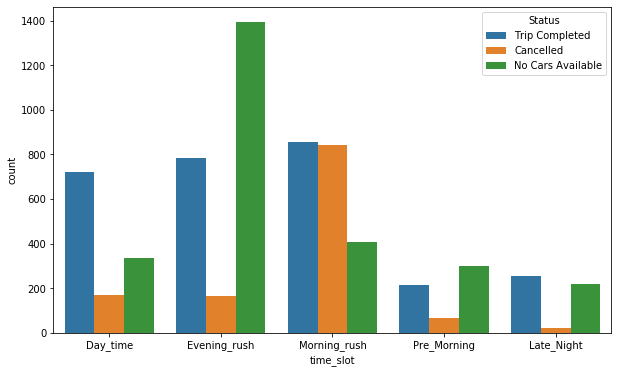

In [16]:
# Let's put this infornmation on charts and make sense
plt.figure(figsize=(10,6))
sns.countplot(x='time_slot',hue="Status",data=df)

By looking at the graph we can splot a huge green line which represents no cars available at the time of evening rush.
If we look ar morning rush, we can see many trips were cancelled. Which is also an alarming situation.
So moving forward we will do small analysis on morning and evening rush.

In [17]:
#Now we compare data of pick up points in morning rush
df_morning_rush=df[df['time_slot']=="Morning_rush"]

Text(0.5, 1.0, 'Morning Rush')

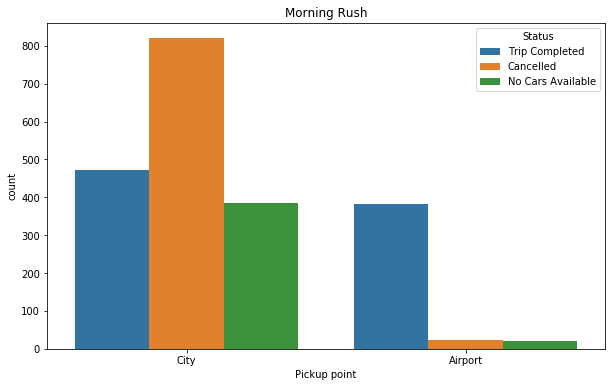

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pickup point',hue='Status',data=df_morning_rush)
plt.title("Morning Rush")

As we can see, their is some serious problem at morning rush hours, cabs are getting cancelled.

### Addressing the problem of morning rush

In [19]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]

23

At airport 23 cabs were cancelled in total.

In [20]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

820

Whereas in city total of 820 cabs were cancelled during morning rush. Which creates a huge problem for the company.

### Lets address the evening rush problem.

Text(0.5, 1.0, 'Evening Rush')

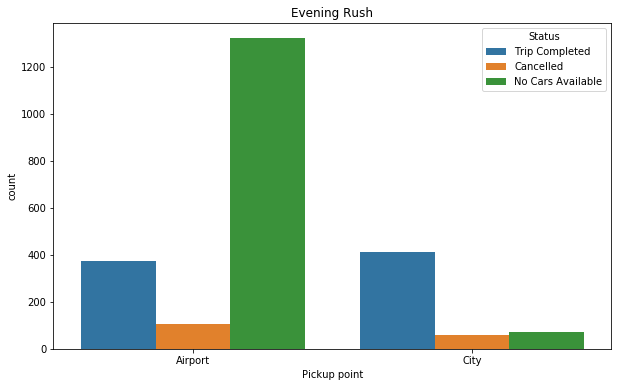

In [21]:
#Now we compare data of pick up points in evening rush
df_evening_rush=df[df['time_slot']=="Evening_rush"]
plt.figure(figsize=(10,6))
sns.countplot(x='Pickup point',hue='Status',data=df_evening_rush)
plt.title("Evening Rush")

As we can see in evening cars at airport are not available. This is some serious problem causing Uber to lose on revenue.

## Severity  of problem

By looking at the above analysis, we can make out 2 major problems that is causing Uber to lose business.

1.Cabs getting canclled in city at morning rush hours.

2.Lack of cab avaibality at airport at evening rush.

These 2 are the major causes that Uber is loosing revenue.